In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("C:\\Users\Bhavani\OneDrive\Desktop\durga\Project\Twitter_Data.csv")

In [3]:
print(data.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None


In [5]:
print(data.describe())

            category
count  162973.000000
mean        0.225436
std         0.781279
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


In [6]:
print(data.isnull())

        clean_text  category
0            False     False
1            False     False
2            False     False
3            False     False
4            False     False
...            ...       ...
162975       False     False
162976       False     False
162977       False     False
162978       False     False
162979       False     False

[162980 rows x 2 columns]


In [7]:
data['clean_text'] = data['clean_text'].fillna('')
sentiments = []
for text in data['clean_text']:
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)
data['sentiment'] = sentiments
print(data[['clean_text', 'sentiment']])


                                               clean_text sentiment
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...  Negative
162976  dear rss terrorist payal gawar what about modi...  Negative
162977  did you cover her interaction forum where she ...   Neutral
162978  there big project came into india modi dream p...   Neutral
162979  have you ever listen about like gurukul where ...  Positive

[162980 rows x 2 columns]


In [8]:
data = data.dropna(subset=['clean_text'])


In [9]:
data = data.dropna(subset=['category'])

In [10]:
if data['category'].isnull().sum() > 0:
    print("Warning: NaN values still present in the 'category' column.")
else:
    X = data['clean_text']
    y = data['category']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9262463568031907
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.91      0.83      0.87      7230
         0.0       0.92      0.98      0.95     10961
         1.0       0.94      0.94      0.94     14404

    accuracy                           0.93     32595
   macro avg       0.92      0.91      0.92     32595
weighted avg       0.93      0.93      0.93     32595



C:\Users\Bhavani\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


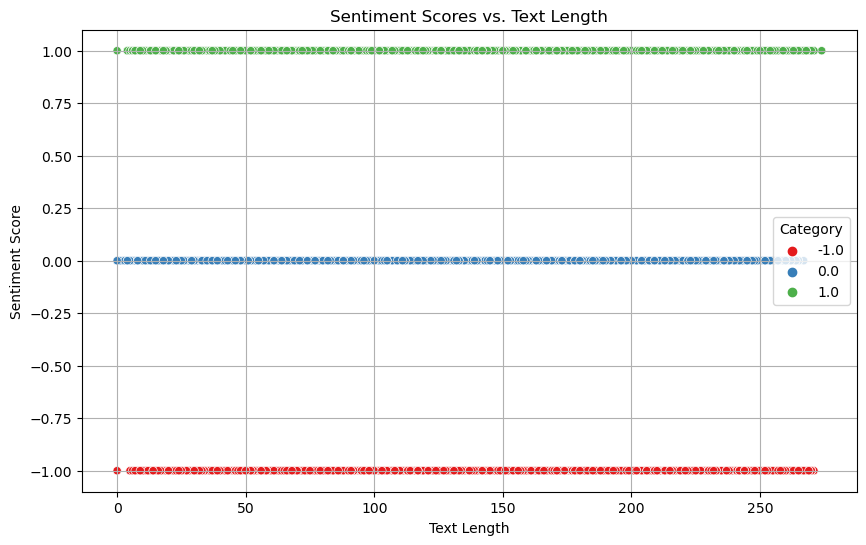

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['clean_text'].apply(len), y=data['category'], hue=data['category'], palette='Set1')
plt.title('Sentiment Scores vs. Text Length')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.legend(title='Category')
plt.grid(True)
plt.show()

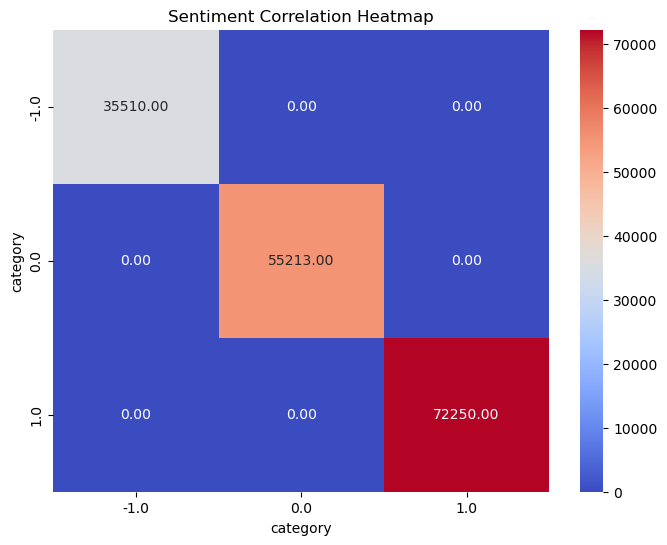

In [15]:
sentiment_scores = data[['clean_text', 'category']].pivot_table(index='category', columns='category', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_scores, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sentiment Correlation Heatmap')
plt.show()

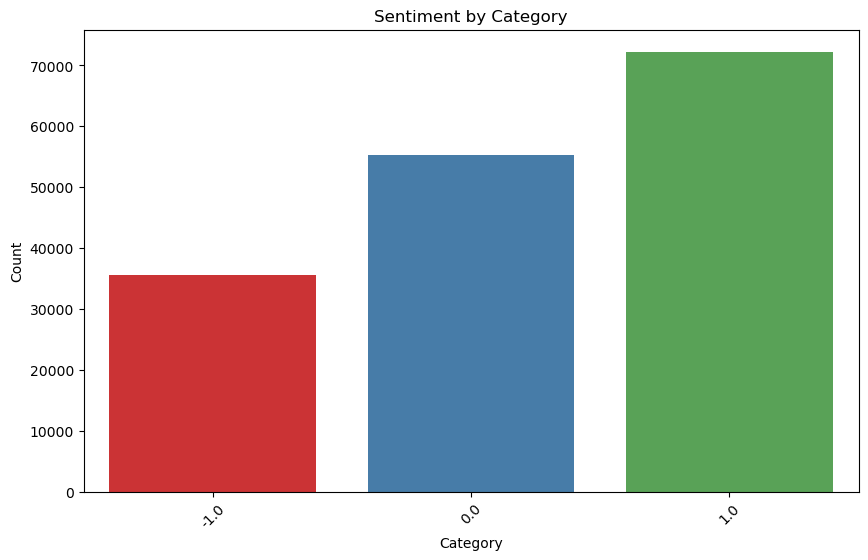

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=data, palette='Set1')
plt.title('Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()